<a href="https://colab.research.google.com/github/jeevith2011/mini-projects-basics/blob/main/Basics_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



---


# **MiniProject 3**
HR Data (9 tasks)

##Setup the files and stuff

Setup (will ask for Google credentials at first use)

In [ ]:
from google.colab import drive
# NOTE: this will pop up asking for google login permission
drive.mount('/content/drive')
# linux command to list the files under linux running
#Colab Jupyter notebook (prints dir/files/links in your Drive)
!ls -ltr /content/drive/MyDrive/Zoom-Recordings-Common/ | grep *.csv
!ls -ltr /content/drive/MyDrive/Zoom-Recordings-Common/dataset/dataset_csv/
!ls -ltr /content/drive/MyDrive/Zoom-Recordings-Common/dataset/dataset_csv/dataset-hr | grep dataset
!ls -ltr /content/drive/MyDrive/Zoom-Recordings-Common/dataset/dataset_csv/dataset-hr/HR_comma_sep.csv | grep dataset

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
dataset-airports			    dataset-hr
dataset-covid				    dataset-museum-artifacts
dataset-covid-2				    dataset_open_crime_uk
dataset-domestic-flights-from-1990-to-2009  dataset-powerlifting-csv
dataset_ebola				    dataset-titanic
dataset-forest-fire			    dataset-world-economy-worldbank
dataset-google-scholar


Snippet to start a task

In [ ]:
import pandas as pd
from pandas.core.algorithms import value_counts
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

df = pd.read_csv("/content/drive/MyDrive/dataset/dataset_csv/dataset-hr/HR_comma_sep.csv")

##Main Project
1. How many employees in each department

In [ ]:
import pandas as pd
from pandas.core.algorithms import value_counts
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

df = pd.read_csv("/content/drive/MyDrive/dataset/dataset_csv/dataset-hr/HR_comma_sep.csv")
df = df['sales'].value_counts().to_frame()
df = df.to_dict()['sales']

df = pd.DataFrame(df, index=['sales', 'num_employees'])
df = df.swapaxes('index', 'columns')

print(df)

2. Among employees who left, get the department wise (use column "sales"), number of employees and rank them.

In [ ]:
import pandas as pd
from pandas.core.algorithms import value_counts
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

df = pd.read_csv("/content/drive/MyDrive/dataset/dataset_csv/dataset-hr/HR_comma_sep.csv")
df = df.loc[df['left'] == 1]
df = df['sales'].value_counts().to_frame()
df = df.to_dict()['sales']

df = pd.DataFrame(df, index=['employees_left'])
df = df.swapaxes('index', 'columns')
df.insert(0, 'rank', list(range(1,11)), True)
print(df)

             rank  employees_left
sales           1            1014
technical       2             697
support         3             555
IT              4             273
hr              5             215
accounting      6             204
marketing       7             203
product_mng     8             198
RandD           9             121
management     10              91


3. Average number of le (time_spend_company) and average number of monthly hours (average_monthly_hours) for the employees left and not left under each department. Sort the value by sales.

In [ ]:
import pandas as pd
from statistics import mean
from pandas.core.algorithms import value_counts
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

df = pd.read_csv("/content/drive/MyDrive/dataset/dataset_csv/dataset-hr/HR_comma_sep.csv")

out = df.groupby(['left', 'sales']) \
['time_spend_company', 'average_montly_hours'].mean().reset_index()

print(out)

    left        sales  time_spend_company  average_montly_hours
0      0           IT            3.356394            198.886792
1      0        RandD            3.252252            198.951952
2      0   accounting            3.424512            199.037300
3      0           hr            3.192748            199.250000
4      0   management            4.395176            200.233766
5      0    marketing            3.480916            198.888550
6      0  product_mng            3.330966            197.765625
7      0        sales            3.443698            199.571657
8      0      support            3.213859            199.140980
9      0    technical            3.222442            198.471083
10     1           IT            3.860806            213.849817
11     1        RandD            4.000000            210.975207
12     1   accounting            3.794118            207.029412
13     1           hr            3.753488            197.306977
14     1   management            3.75824

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  # Remove the CWD from sys.path while we load stuff.


4. Under each department, what is the minimum and maximum for both left and not left employees related to time_spend_company and average_monthly_hours. Sort the value by sales.

In [ ]:
### PROGRAM CONFIGURATIONS

# Min/Max: Choose most or least values. Only use 'min' or 'max'
minmax = 'max'

### END PROGRAM CONFIGURATIONS
import pandas as pd
from pandas.core.algorithms import value_counts
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

min_years_ls, min_monthly_hrs_ls, max_years_ls, max_monthly_hrs_ls = [], [], [], []
departments = ['sales', 'technical', 'support', 'IT', 'hr', 'accounting', 'marketing', 'product_mng' ,'RandD', 'management']

for i in departments:
  df = pd.read_csv("/content/drive/MyDrive/dataset/dataset_csv/dataset-hr/HR_comma_sep.csv")
  df = df.loc[df['sales'] == i]

  years = df['average_montly_hours'].value_counts().to_frame() # swapped both due to some error in data
  monthly_hrs = df['time_spend_company'].value_counts().to_frame()

  years = years['average_montly_hours'].to_list()
  monthly_hrs = monthly_hrs['time_spend_company'].to_list()

  min_years = min([int(i) for i in years])
  max_years = max([int(i) for i in years])
  min_monthly_hrs = min([int(i) for i in monthly_hrs])
  max_monthly_hrs = max([int(i) for i in monthly_hrs])

  min_years_ls.append(min_years)
  min_monthly_hrs_ls.append(min_monthly_hrs)
  max_years_ls.append(max_years)
  max_monthly_hrs_ls.append(max_monthly_hrs)

df = pd.DataFrame({'department': departments, 'min_years': min_years_ls, \
                   'min_monthly_hrs': min_monthly_hrs_ls, 'max_years': max_years_ls, \
                   'max_monthly_hrs': max_monthly_hrs_ls}, index=list(range(1,11)))

print(f'minmax = {minmax}\n\n{df}')

minmax = max

     department  min_years  min_monthly_hrs  max_years  max_monthly_hrs
1         sales          1               48         67             1768
2     technical          1                2         35             1161
3       support          1               12         29              974
4            IT          1               10         22              523
5            hr          1                6         16              333
6    accounting          1               10         13              335
7     marketing          1               10         14              382
8   product_mng          1                8         17              386
9         RandD          1               10         17              341
10   management          1               20         11              240


5. Under each department, what is the minimum, maximum, average on last evaluation (last_evaluation) and satisfaction level (satisfaction_level) for both left and not left. Sort the value by sales.

In [ ]:
### PROGRAM CONFIGURATIONS

# Mode: Choose most/average/least values. Only use 'min', 'max' or 'avg'
mode = 'max'

### END PROGRAM CONFIGURATIONS
import pandas as pd
from pandas.core.algorithms import value_counts
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

min_le_ls, min_satisfaction_ls, avg_le_ls, avg_satisfaction_ls, max_le_ls, max_satisfaction_ls = [], [], [], [], [], []
departments = ['sales', 'technical', 'support', 'IT', 'hr', 'accounting', 'marketing', 'product_mng' ,'RandD', 'management']

for i in departments:
  df = pd.read_csv("/content/drive/MyDrive/dataset/dataset_csv/dataset-hr/HR_comma_sep.csv")
  df = df.loc[df['sales'] == i]

  le = df['last_evaluation'].value_counts().to_frame()
  satisfaction = df['satisfaction_level'].value_counts().to_frame()

  le = le['last_evaluation'].to_list()
  satisfaction = satisfaction['satisfaction_level'].to_list()

  min_le = min([int(i) for i in le])
  avg_le = mean([int(i) for i in le])
  max_le = max([int(i) for i in le])
  min_satisfaction = min([int(i) for i in satisfaction])
  avg_satisfaction = mean([int(i) for i in satisfaction])
  max_satisfaction = max([int(i) for i in satisfaction])

  min_le_ls.append(min_le)
  min_satisfaction_ls.append(min_satisfaction)
  avg_le_ls.append(avg_le)
  avg_satisfaction_ls.append(avg_satisfaction)
  max_le_ls.append(max_le)
  max_satisfaction_ls.append(max_satisfaction)

df = pd.DataFrame({'department': departments, 'min_le': min_le_ls, \
                   'min_sat': min_satisfaction_ls, 'avg_le': avg_le_ls, \
                   'avg_sat': avg_satisfaction_ls, 'max_le': max_le_ls, \
                   'max_sat': max_satisfaction_ls}, index=list(range(1,11)))

print(f'mode = {mode}\nle = last_evaluation, sat = satisfaction\n\n{df}')

mode = max
le = last_evaluation, sat = satisfaction

     department  min_le  min_sat     avg_le    avg_sat  max_le  max_sat
1         sales       8        3  63.692308  45.000000     114       92
2     technical       3        3  41.846154  29.565217      69       79
3       support       3        2  34.292308  24.228261      68       53
4            IT       1        1  19.171875  13.633333      39       35
5            hr       1        1  11.730159   8.211111      26       19
6    accounting       1        1  11.984375   8.522222      27       27
7     marketing       1        1  13.406250   9.533333      31       25
8   product_mng       2        1  13.876923  10.250000      30       24
9         RandD       1        1  12.107692   8.744444      28       19
10   management       1        1  10.161290   7.325581      20       26


6. Under each department, what is the count on work accidents (work_accident) and promotion for the last 5 years (promotion_last_5years) for both left and not left. Sort the value by sales.

In [ ]:
import pandas as pd
from pandas.core.algorithms import value_counts
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

departments = ['sales', 'technical', 'support', 'IT', 'hr', 'accounting', 'marketing', 'product_mng' ,'RandD', 'management']
accident_ls, promotion_ls = [], []

for i in departments:
  df = pd.read_csv("/content/drive/MyDrive/dataset/dataset_csv/dataset-hr/HR_comma_sep.csv")
  df = df.loc[df['sales'] == i]

  work_accidents = df['Work_accident'].value_counts().to_frame()
  promotions = df['promotion_last_5years'].value_counts().to_frame()

  work_accidents = work_accidents['Work_accident'].to_list()[0]
  promotions = promotions['promotion_last_5years'].to_list()[0]

  accident_ls.append(work_accidents)
  promotion_ls.append(promotions)

df = pd.DataFrame({'department':departments, 'work_accidents':accident_ls, 'promotions_last_5yrs':promotion_ls})
df = df.sort_values(by=['work_accidents', 'promotions_last_5yrs']).to_dict()

data = {}

for v in df.items():
  i, j = v[0], v[1]
  j_val = list(reversed(list(j.values())))
  j_out = dict(zip(list(range(1,11)), j_val))
  data[i] = j_out

df = pd.DataFrame(data)
print(df)

     department  work_accidents  promotions_last_5yrs
1         sales            3553                  4040
2     technical            2339                  2692
3       support            1884                  2209
4            IT            1063                  1224
5   product_mng             770                   902
6     marketing             720                   815
7    accounting             671                   753
8         RandD             653                   760
9            hr             650                   724
10   management             527                   561


### Task 7
7. Answer tasks 3-6 combined

In [ ]:
import pandas as pd
from statistics import mean
from pandas.core.algorithms import value_counts
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

min_le_ls, min_satisfaction_ls, avg_le_ls, avg_satisfaction_ls, max_le_ls, max_satisfaction_ls = [], [], [], [], [], []
accident_ls, promotion_ls, min_years_ls, avg_years_ls, max_years_ls = [], [], [], [], []
min_monthly_hrs_ls, avg_monthly_hrs_ls, max_monthly_hrs_ls = [], [], []

departments = ['sales', 'technical', 'support', 'IT', 'hr', 'accounting', 'marketing', 'product_mng' ,'RandD', 'management']

for i in departments:
  df = pd.read_csv("/content/drive/MyDrive/dataset/dataset_csv/dataset-hr/HR_comma_sep.csv")
  df = df.loc[df['sales'] == i]

  le = df['last_evaluation'].value_counts().to_frame()
  satisfaction = df['satisfaction_level'].value_counts().to_frame()

  le = le['last_evaluation'].to_list()
  satisfaction = satisfaction['satisfaction_level'].to_list()

  min_le = min([int(i) for i in le])
  avg_le = mean([int(i) for i in le])
  max_le = max([int(i) for i in le])
  min_satisfaction = min([int(i) for i in satisfaction])
  avg_satisfaction = mean([int(i) for i in satisfaction])
  max_satisfaction = max([int(i) for i in satisfaction])

  min_le_ls.append(min_le)
  avg_le_ls.append(avg_le)
  max_le_ls.append(max_le)
  min_satisfaction_ls.append(min_satisfaction)
  avg_satisfaction_ls.append(avg_satisfaction)
  max_satisfaction_ls.append(max_satisfaction)

  years = df['average_montly_hours'].value_counts().to_frame() # swapped both due to some error in data
  monthly_hrs = df['time_spend_company'].value_counts().to_frame()

  years = years['average_montly_hours'].to_list()
  monthly_hrs = monthly_hrs['time_spend_company'].to_list()

  min_years = min([int(i) for i in years])
  avg_years = mean([int(i) for i in years])
  max_years = max([int(i) for i in years])
  min_monthly_hrs = min([int(i) for i in monthly_hrs])
  avg_monthly_hrs = mean([int(i) for i in monthly_hrs])
  max_monthly_hrs = max([int(i) for i in monthly_hrs])

  min_years_ls.append(min_years)
  avg_years_ls.append(avg_years)
  max_years_ls.append(max_years)
  min_monthly_hrs_ls.append(min_monthly_hrs)
  avg_monthly_hrs_ls.append(avg_monthly_hrs)
  max_monthly_hrs_ls.append(max_monthly_hrs)

  work_accidents = df['Work_accident'].value_counts().to_frame()
  promotions = df['promotion_last_5years'].value_counts().to_frame()

  work_accidents = work_accidents['Work_accident'].to_list()[0]
  promotions = promotions['promotion_last_5years'].to_list()[0]

  accident_ls.append(work_accidents)
  promotion_ls.append(promotions)

data = {'department': departments, 'min_le': min_le_ls, \
        'min_sat': min_satisfaction_ls, 'avg_le': avg_le_ls, \
         'avg_sat': avg_satisfaction_ls, 'max_le': max_le_ls, \
         'max_sat': max_satisfaction_ls, 'department': departments, 'min_years': min_years_ls, \
         'min_monthly_hrs': min_monthly_hrs_ls, 'avg_years': avg_years_ls, \
         'avg_monthly_hrs': avg_monthly_hrs_ls, 'max_years': max_years_ls, \
         'max_monthly_hrs': max_monthly_hrs_ls, 'work_accidents': accident_ls, \
         'promotion_last_5yrs': promotion_ls}

df = pd.DataFrame.from_dict(data, orient='index').swapaxes('index', 'columns')

print(df)

mode = max

     department min_le min_sat     avg_le    avg_sat max_le max_sat min_years  \
0        sales      8       3  63.692308         45    114      92         1   
1    technical      3       3  41.846154  29.565217     69      79         1   
2      support      3       2  34.292308  24.228261     68      53         1   
3           IT      1       1  19.171875  13.633333     39      35         1   
4           hr      1       1  11.730159   8.211111     26      19         1   
5   accounting      1       1  11.984375   8.522222     27      27         1   
6    marketing      1       1   13.40625   9.533333     31      25         1   
7  product_mng      2       1  13.876923      10.25     30      24         1   
8        RandD      1       1  12.107692   8.744444     28      19         1   
9   management      1       1   10.16129   7.325581     20      26         1   

  min_monthly_hrs  avg_years avg_monthly_hrs max_years max_monthly_hrs  \
0              48  19.345794    

### Task 8
8. Using output from task 7, plot a grouped bar chart with seaborn. There must be two bars, one bar representing left and another for not left. This plot is for each unique department values in column “sales.”

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  del sys.path[0]


<Figure size 864x720 with 0 Axes>

Text(0, 0.5, 'avg_time_spend_company')

Text(0.5, 0, 'sales')

Text(0.5, 1.0, 'Grouped Barchart')

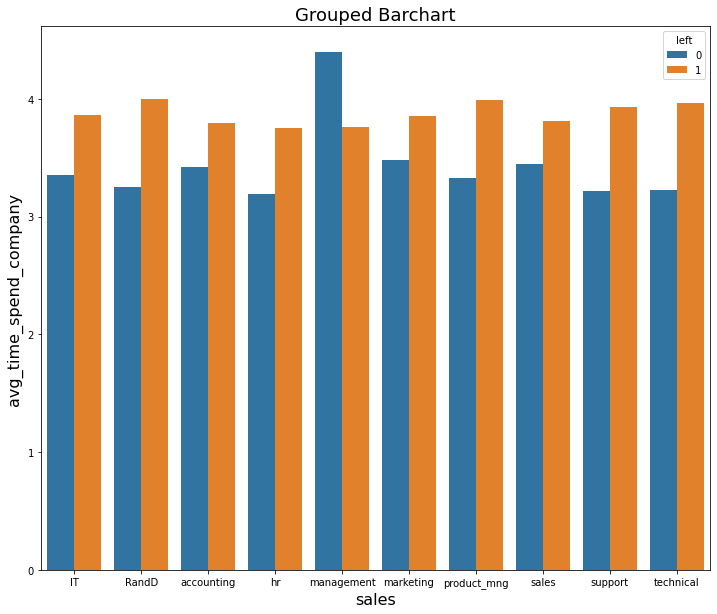

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statistics import mean
from pandas.core.algorithms import value_counts
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

df = pd.read_csv("/content/drive/MyDrive/dataset/dataset_csv/dataset-hr/HR_comma_sep.csv")

out = df.groupby(['left', 'sales']) \
['time_spend_company', 'average_montly_hours'].mean().reset_index()

plt.figure(figsize=(12, 10))
sns.barplot(x='sales', y='time_spend_company', hue='left', data=out)
plt.ylabel('avg_time_spend_company', size=16)
plt.xlabel('sales', size=16)
plt.title('Grouped Barchart', size=18)



---


# **Tips**
Some tips that will get you started (and help you when you're confused)

##Weekly meeting tips


1.   These meeting are recorded! Keep it short and sweet!
2.   Describe your what you achieved in code in 5-10 minutes.
3.   What is blocking you? Any blockers? Explain it in a weekly meeting.



## Confused? Here's the steps to finish the project:


1. Read the readme document
2. Watch pair coding videos in order by date
3. Code with the videos
4. If you have any problems, describe it in a weekly meeting and it will be fixed
5. When done, push to Git/GitHub
6. Also, make a presentation about what you learned
7. Once completed with the whole section, do the final report

**Also, make sure to change the compute engine when switching miniprojects.**

**That's it!**

### **If you are experiencing issues with setup scripts, add the Zoom-Recordings-Common folder after the MyDrive folder.**